In [1]:
EMAIL_RECIPIENT = 'alau3@woolworths.com.au'  # recipients email notifications, separated by commas

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import os
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage
import sys
import email_notifications

from downstream_process import *


In [2]:
# set user credentials again
os.environ['GOOGLE_APPLICATION_CREDENTIALS']="adc.json"

# grab creentials from default login, use gcloud auth login
credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

# Make clients.
bqclient = bigquery.Client(credentials=credentials, project='wx-bq-poc',)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)   

>>> Step 1: convert MC results to post MTA_format and upload to BQ
	removing facebook touchpoints from MC output
	df generated for upload to BQ


1it [00:06,  6.09s/it]


	post MTA output uploaded to BQ
	exported to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_2021-03-01_CVM-1661`
>>> Step 2: run post MTA processing (Shanglin's process)
	exported to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_crn_2021-03-01_CVM-1661`
>>> Step 3: Compare results to BAU run


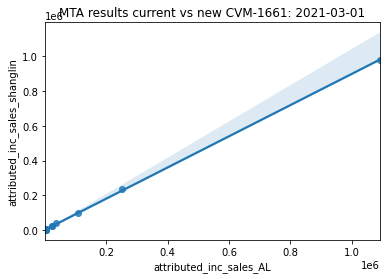

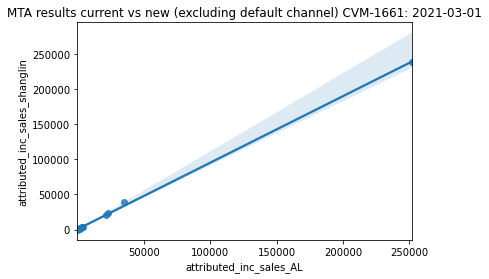

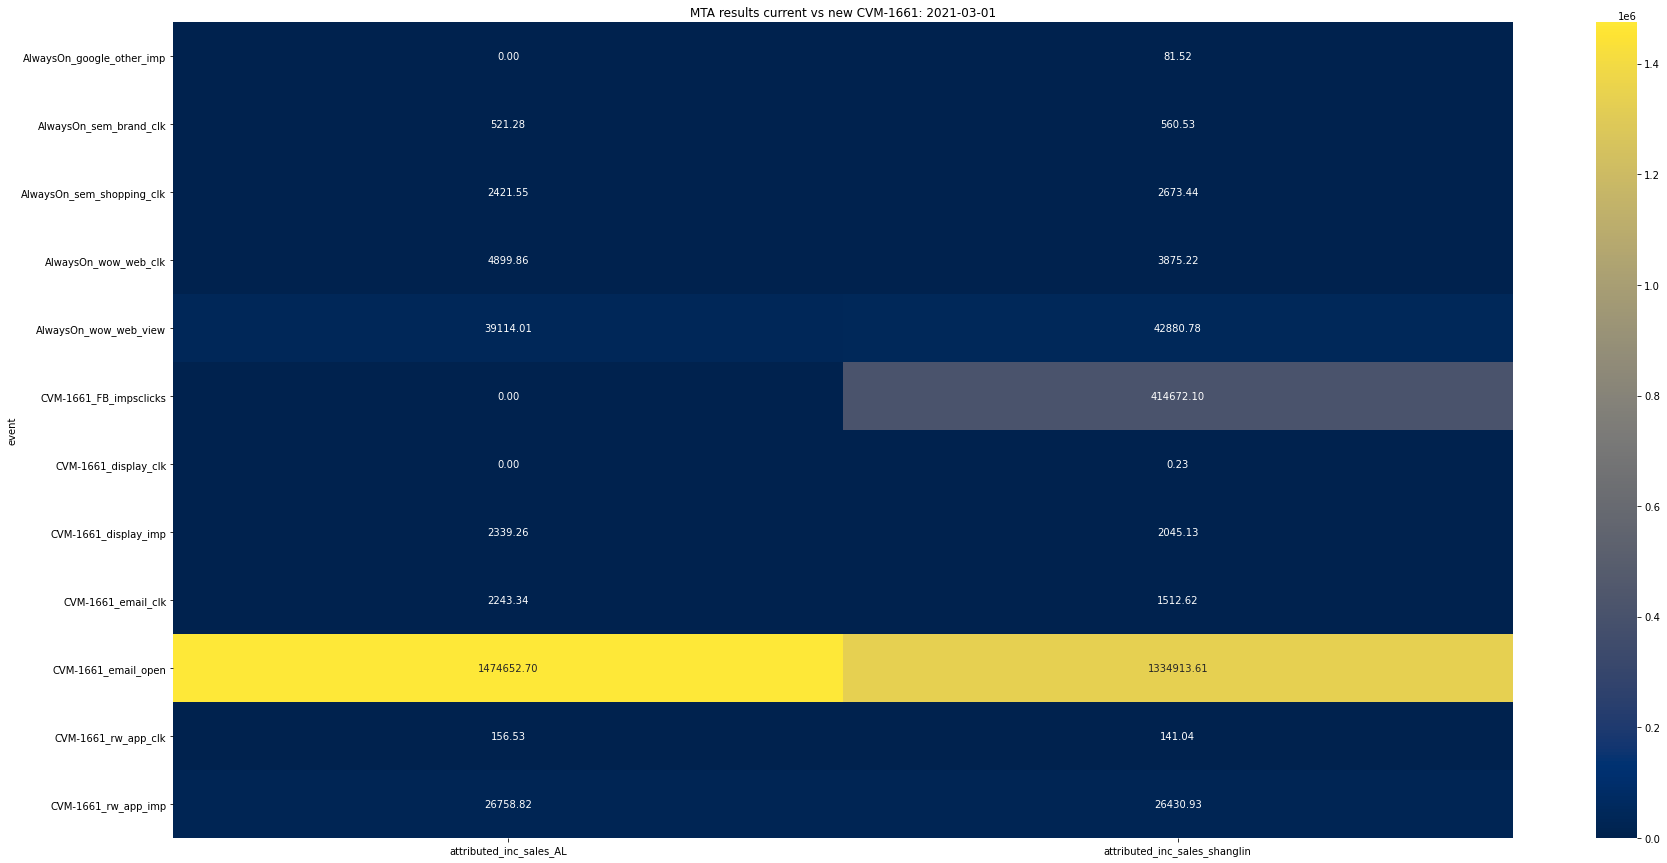

>>> Step 4 (only for fws with FB): Distribute FB inc sales
2021-03-01 ... end of fw is 2021-03-07
	FB attribution ratio is 0.3196416391532997
	non-FB attribution ratio is 0.6803583608467002
	INCREASING inc sales... selected FB scaling ratio is (for missing slice of pie) 0.46981364167482026
	fb inc sales for CVM-1661 increased by 0.46981364174045503
	touchpoint count increased by 1360429
	exported dacamp_prod_mc_final_crn_w_fb to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_crn_w_fb_2021-03-01_CVM-1661`


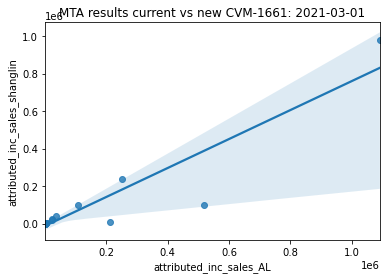

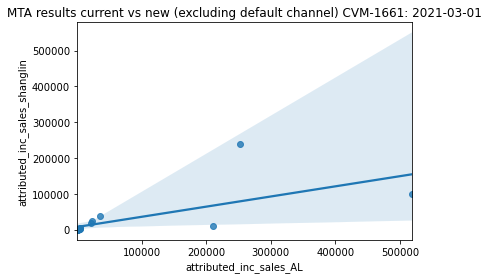

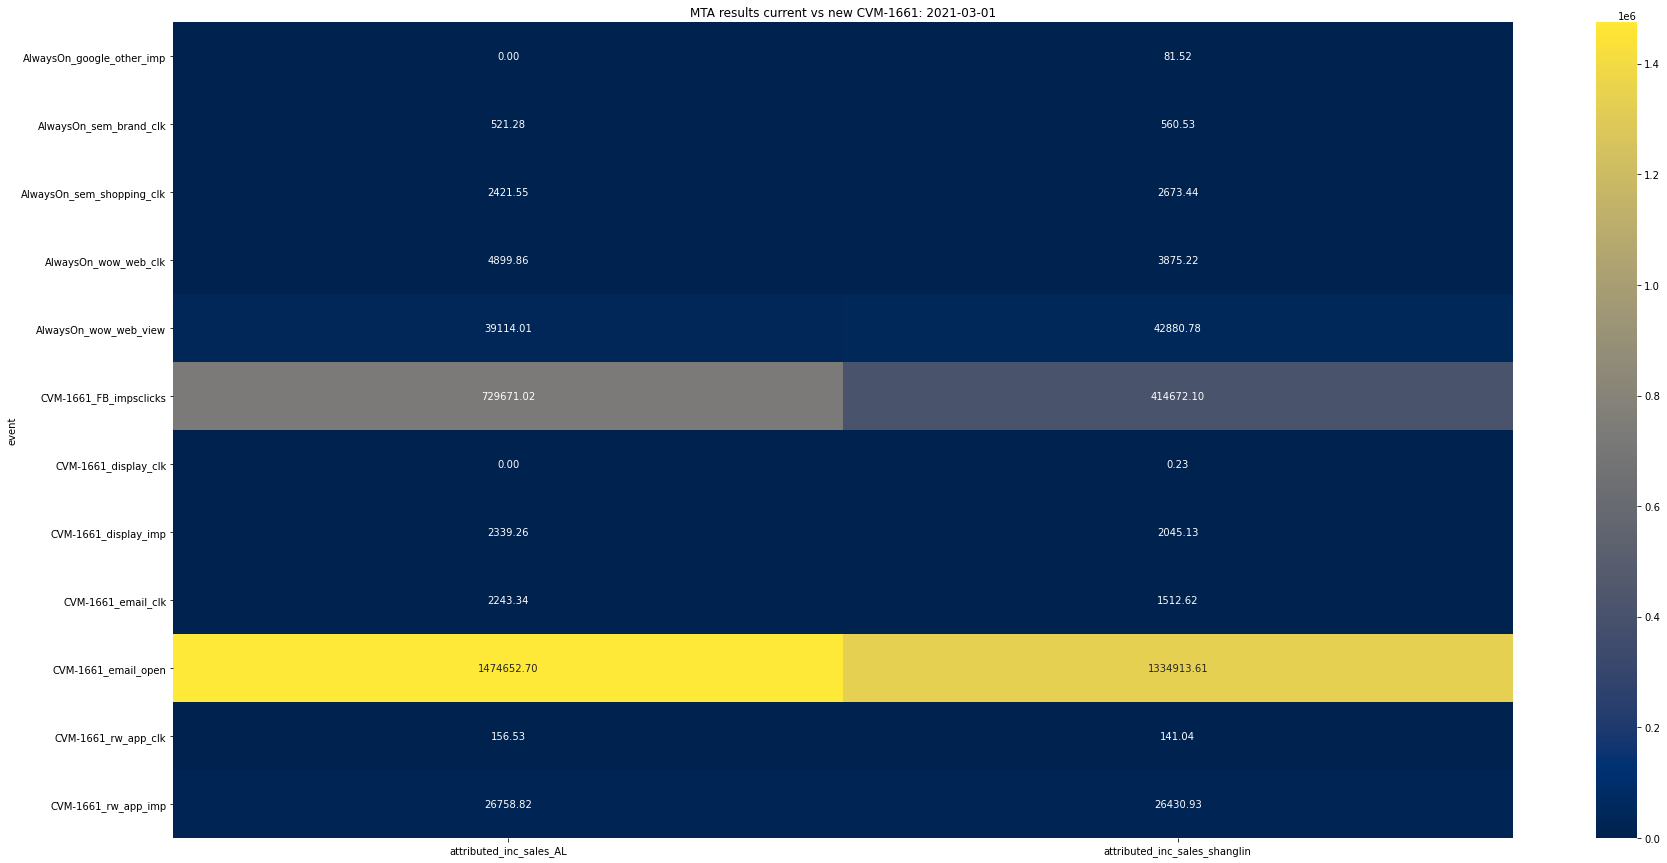

>>> Step 1: convert MC results to post MTA_format and upload to BQ
	removing facebook touchpoints from MC output
	df generated for upload to BQ


1it [00:02,  2.80s/it]


	post MTA output uploaded to BQ
	exported to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_2021-02-22_CVM-1661`
>>> Step 2: run post MTA processing (Shanglin's process)
	exported to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_crn_2021-02-22_CVM-1661`
>>> Step 3: Compare results to BAU run


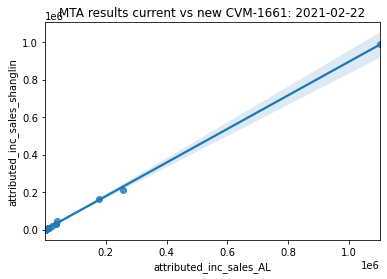

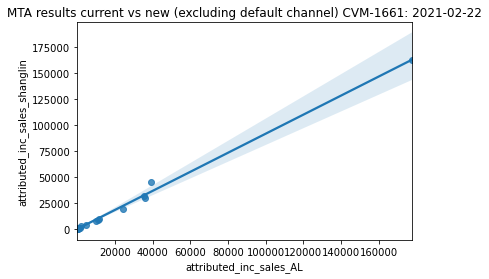

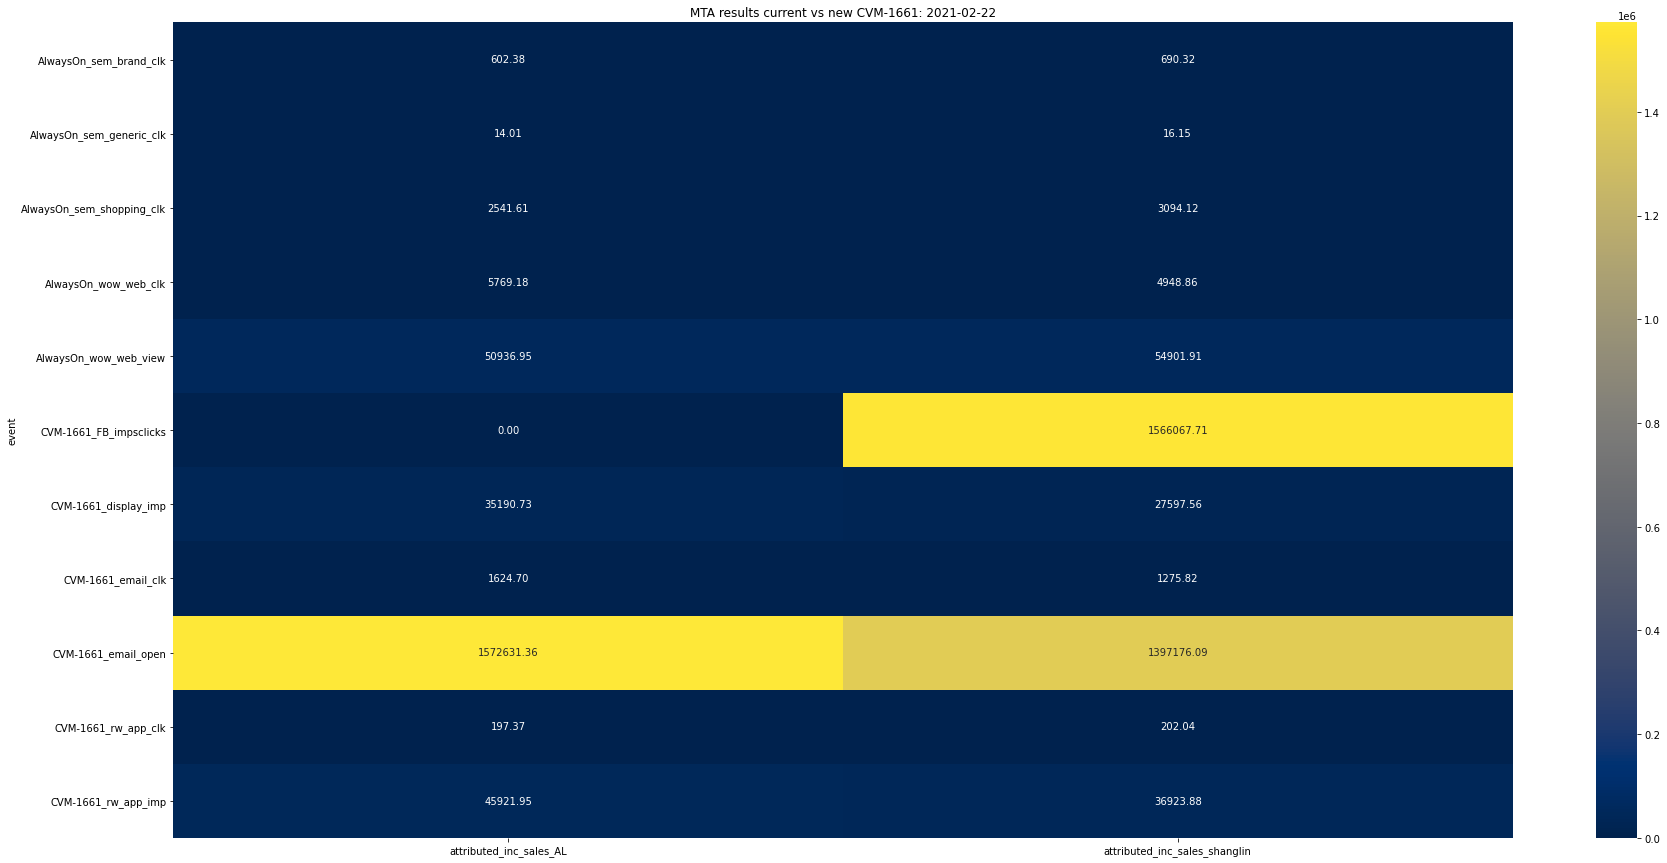

>>> Step 4 (only for fws with FB): Distribute FB inc sales
2021-02-22 ... end of fw is 2021-02-28
	FB attribution ratio is 0.47313125452686866
	non-FB attribution ratio is 0.5268687454731312
	INCREASING inc sales... selected FB scaling ratio is (for missing slice of pie) 0.8980059238510989
	fb inc sales for CVM-1661 increased by 0.8980059238942488
	touchpoint count increased by 1700113
	exported dacamp_prod_mc_final_crn_w_fb to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_crn_w_fb_2021-02-22_CVM-1661`


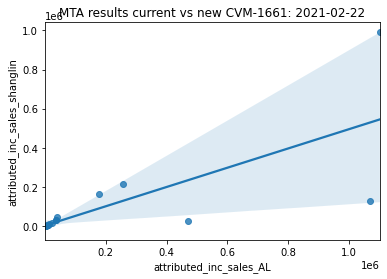

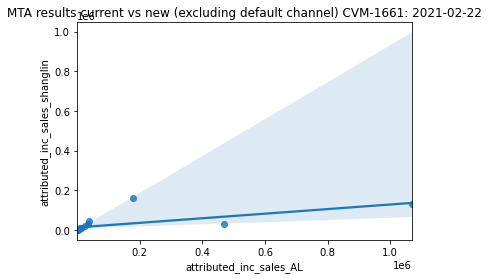

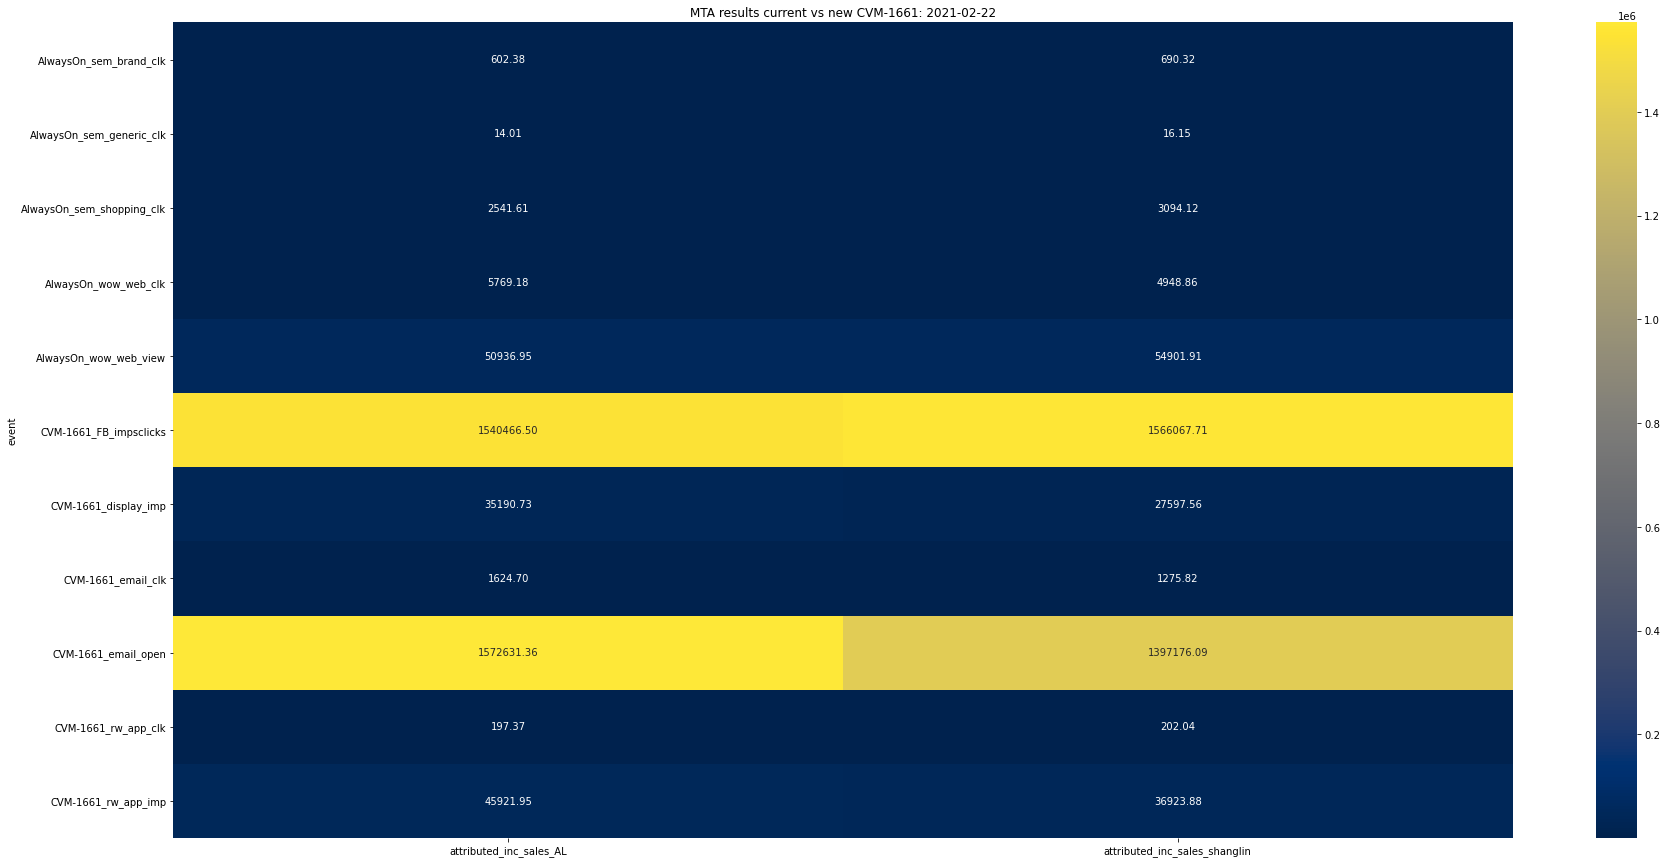

>>> Step 1: convert MC results to post MTA_format and upload to BQ
	removing facebook touchpoints from MC output
	df generated for upload to BQ


1it [00:05,  5.23s/it]


	post MTA output uploaded to BQ
	exported to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_2021-02-15_CVM-1661`
>>> Step 2: run post MTA processing (Shanglin's process)
	exported to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_crn_2021-02-15_CVM-1661`
>>> Step 3: Compare results to BAU run


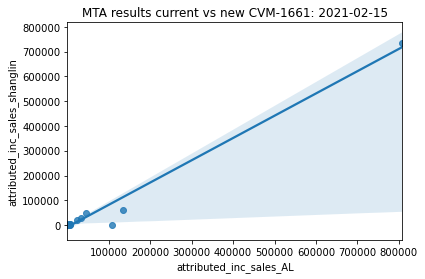

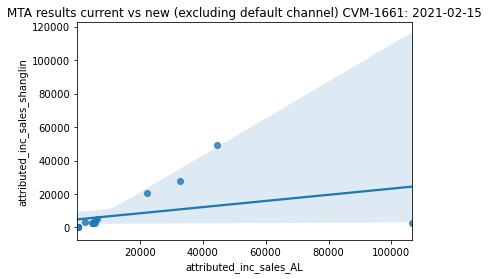

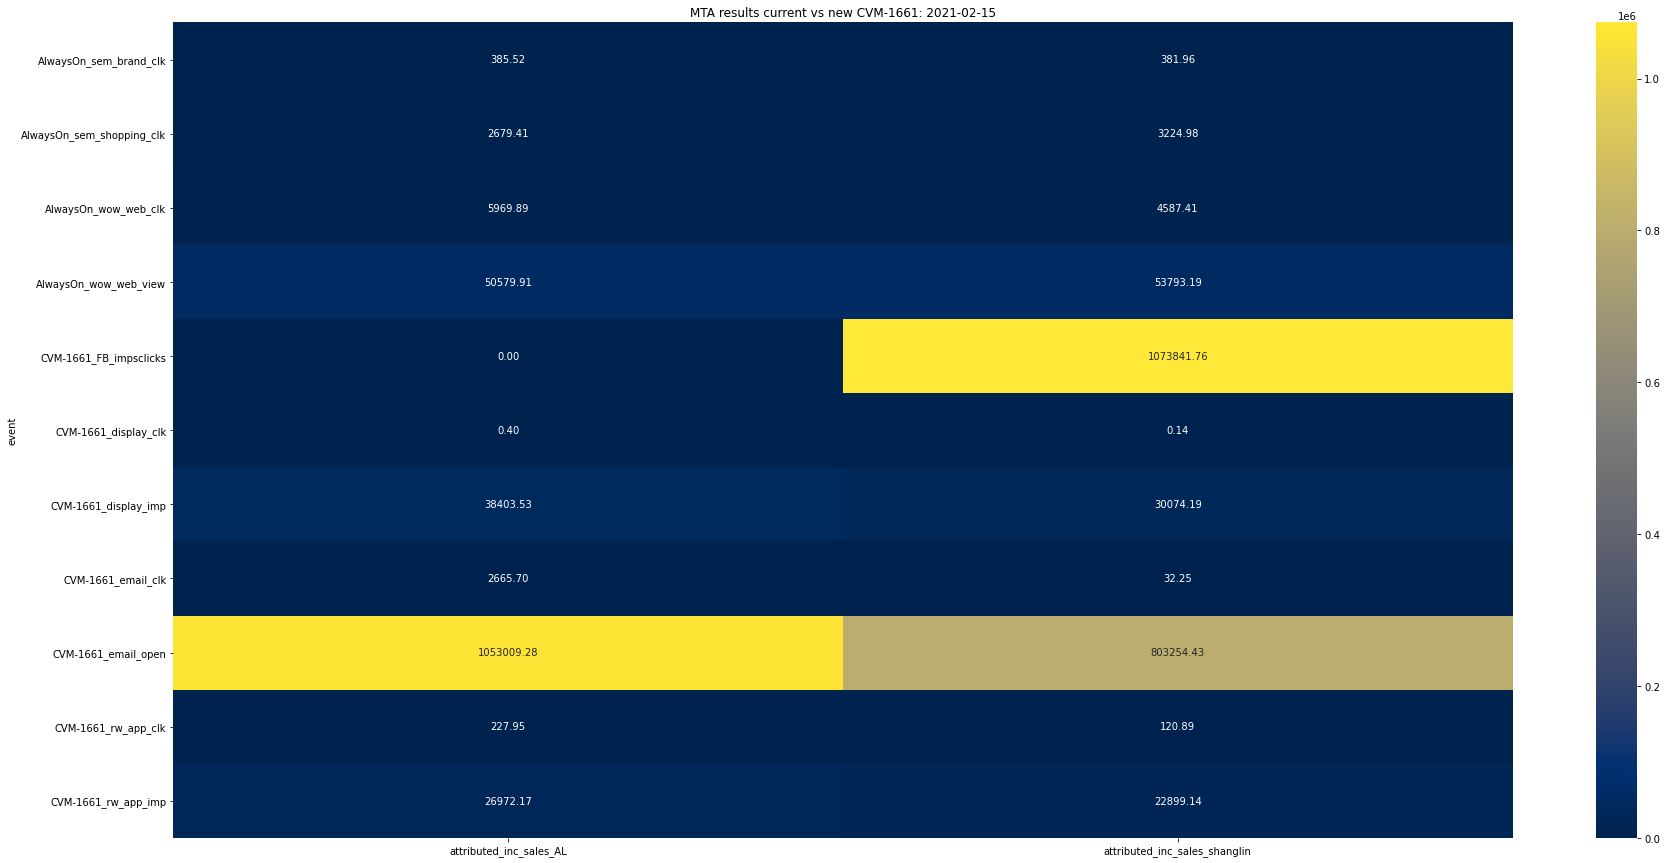

>>> Step 4 (only for fws with FB): Distribute FB inc sales
2021-02-15 ... end of fw is 2021-02-21
	FB attribution ratio is 0.4728371977769776
	non-FB attribution ratio is 0.5271628022230224
	INCREASING inc sales... selected FB scaling ratio is (for missing slice of pie) 0.8969471969248284
	fb inc sales for CVM-1661 increased by 0.8969471969161427
	touchpoint count increased by 1799173
	exported dacamp_prod_mc_final_crn_w_fb to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_crn_w_fb_2021-02-15_CVM-1661`


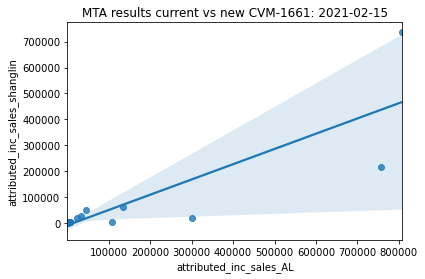

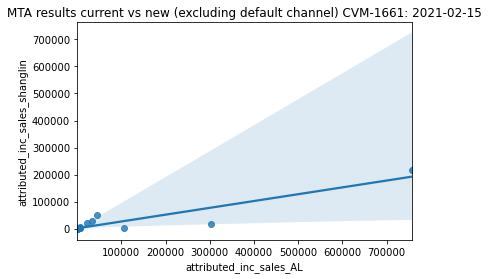

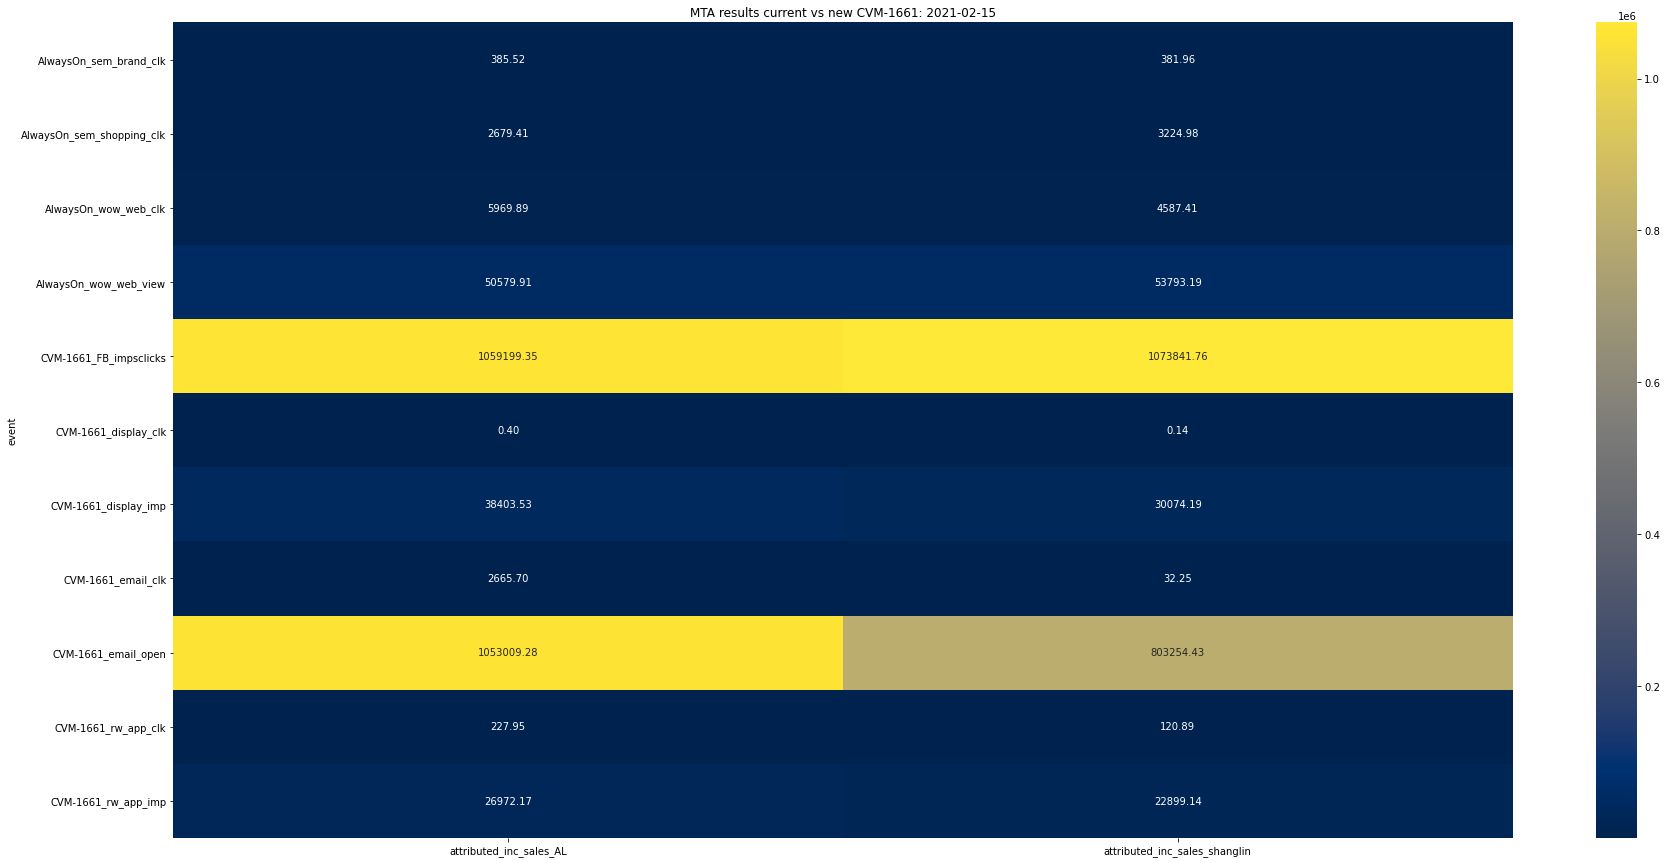

>>> Step 1: convert MC results to post MTA_format and upload to BQ
	removing facebook touchpoints from MC output
	df generated for upload to BQ


1it [00:05,  5.32s/it]


	post MTA output uploaded to BQ
	exported to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_2021-02-08_CVM-1661`
>>> Step 2: run post MTA processing (Shanglin's process)
	exported to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_crn_2021-02-08_CVM-1661`
>>> Step 3: Compare results to BAU run


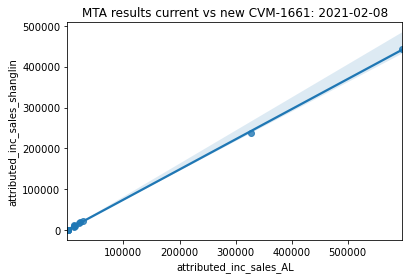

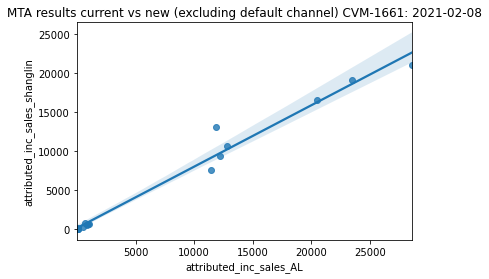

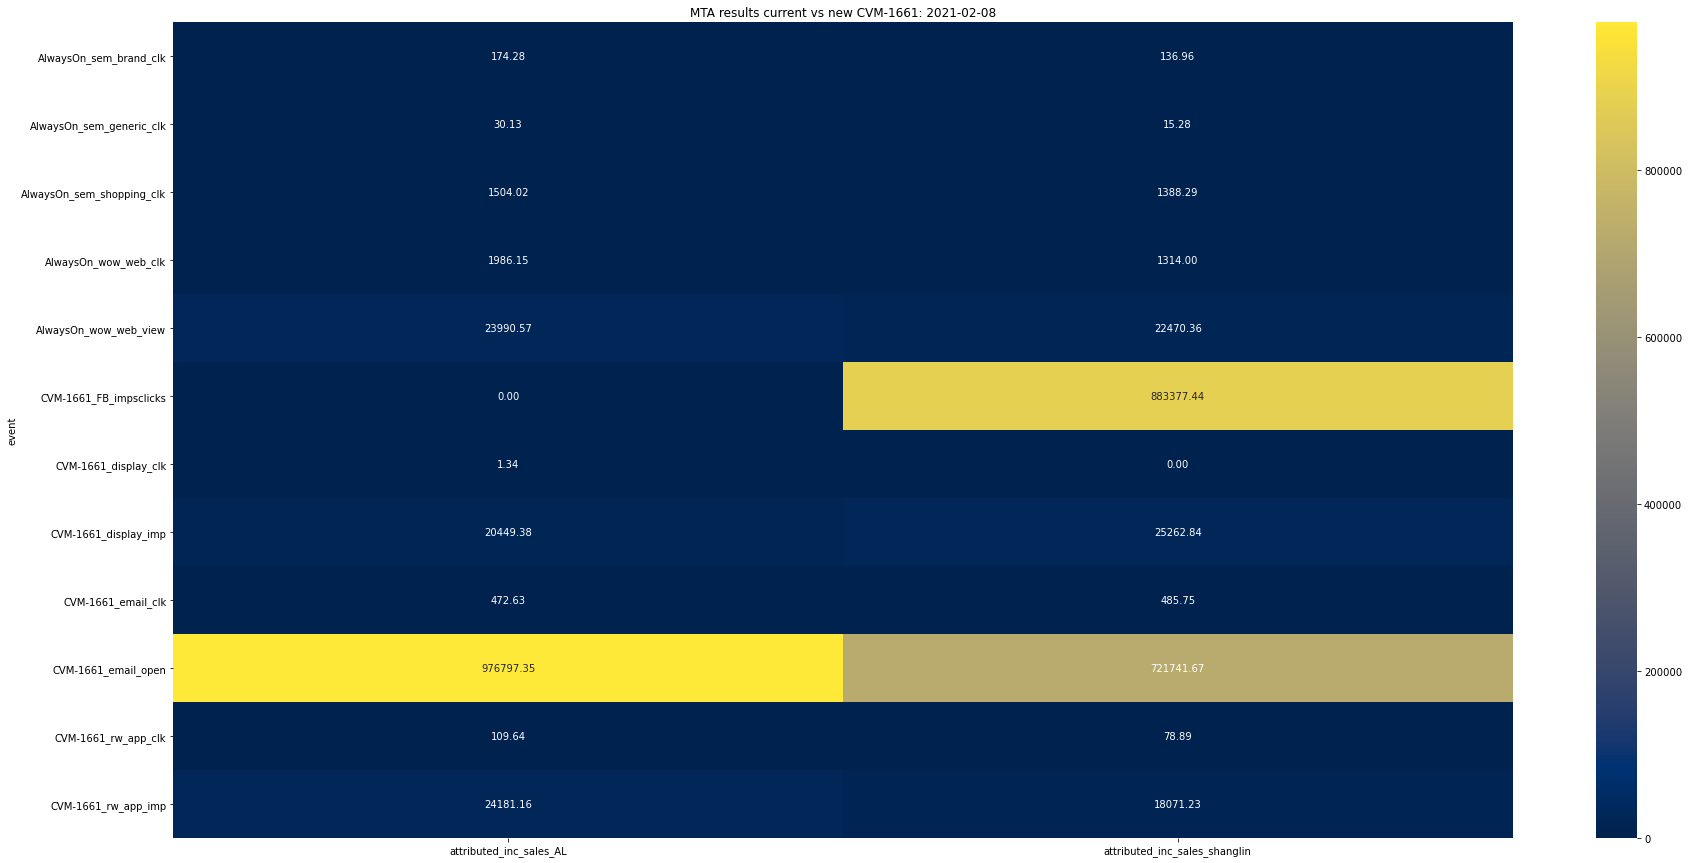

>>> Step 4 (only for fws with FB): Distribute FB inc sales
2021-02-08 ... end of fw is 2021-02-14
	FB attribution ratio is 0.0
	non-FB attribution ratio is 1.0
	INCREASING inc sales... selected FB scaling ratio is (for missing slice of pie) 0.0
	fb inc sales for CVM-1661 increased by 3.770728370396892e-15
	touchpoint count increased by 1783928
	exported dacamp_prod_mc_final_crn_w_fb to `wx-bq-poc.personal.AL_FBAA_MC_dacamp_prod_mc_final_crn_w_fb_2021-02-08_CVM-1661`


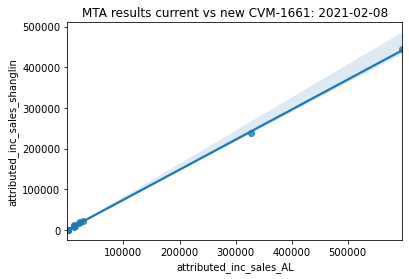

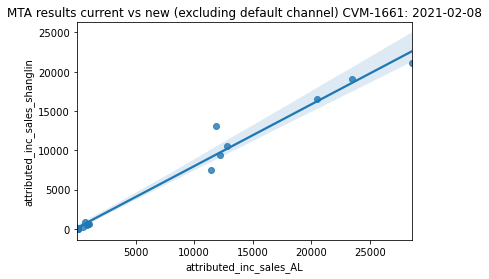

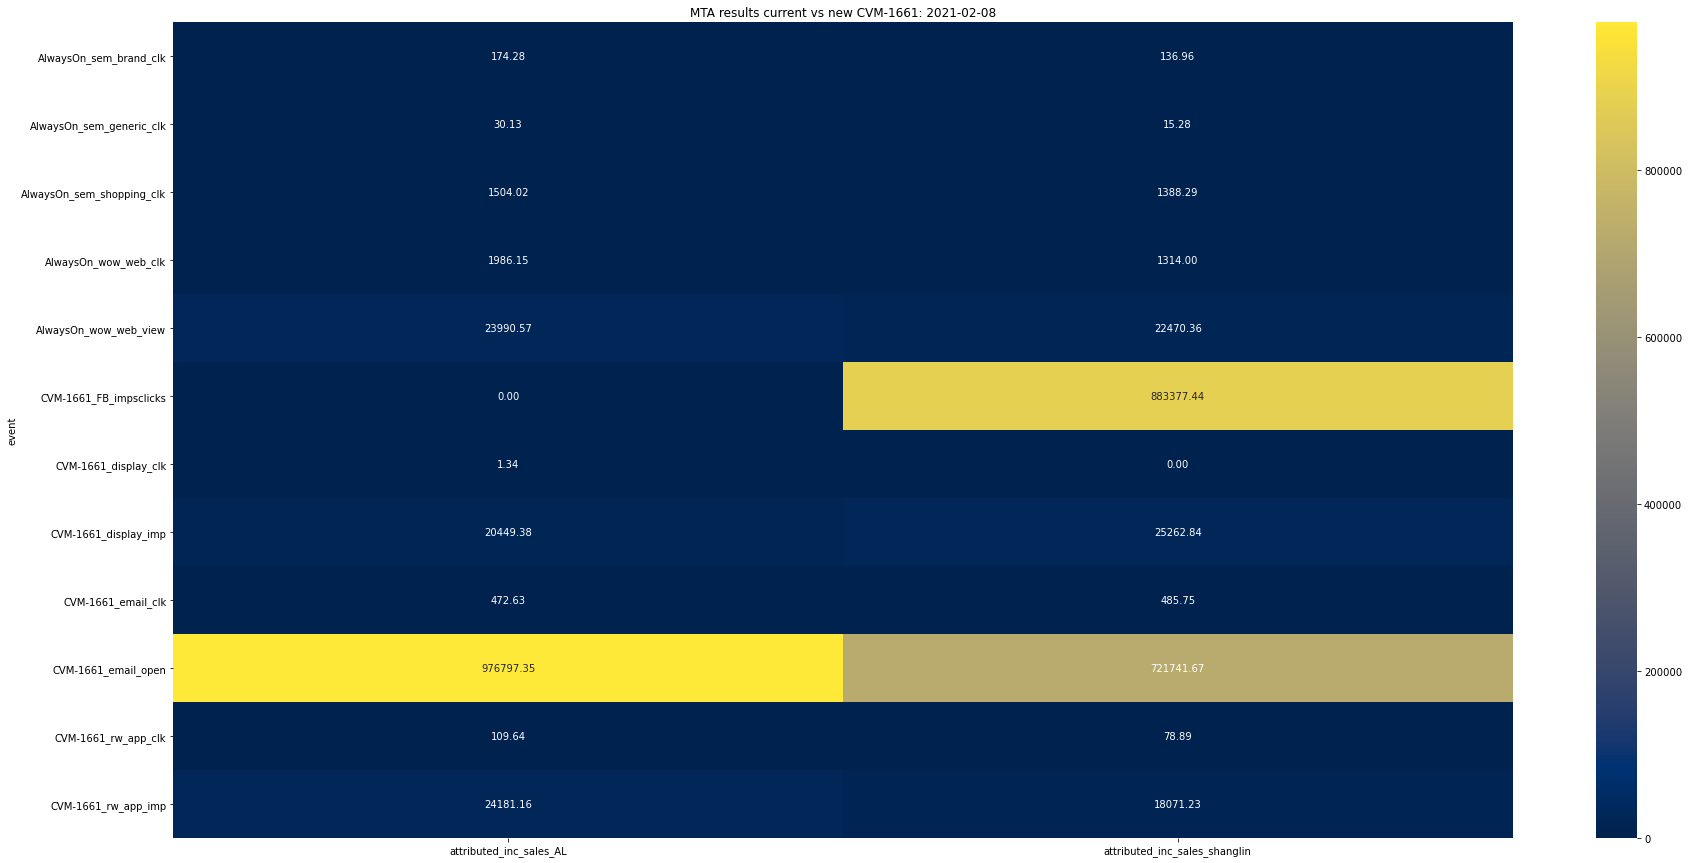

In [3]:
campaign_code = 'CVM-1661'
for fw in ['2021-03-01', '2021-02-22', '2021-02-15', '2021-02-08']:
    # get END of fw
    datetime_object = datetime.datetime.strptime(fw, '%Y-%m-%d')
    datetime_object_plus_6_days = datetime_object + datetime.timedelta(days=6)
    fw_end = datetime_object_plus_6_days.strftime("%Y-%m-%d")
    downstream_process(fpath_results=campaign_code + "/res_weighted_" + campaign_code + "_" + fw + "_" + fw_end + "_7.csv",
                       BQ_output_suffix=campaign_code,
                       campaign_code=campaign_code,
                       fw=fw,
                       safari_run_date="2021-05-25",
    #                    create_dacamp_prod_mc_final=False,
                       create_dacamp_prod_mc_final=True,
    #                    have_historical_marketable_crn=True,
                       have_historical_marketable_crn=False,
                       which_mc_crn_output="Xueyuan",
                       allocate_fb=True,
                       increase_inc_sales=True,
                       fpath_comparison_results=campaign_code + "/comparison/MC_CRN",
                       bqclient=bqclient,
                       bqstorageclient=bqstorageclient)[0]    